In [1]:
import numpy as np
import matplotlib.pyplot as plt

from distributions.distribution_by_sequence import DistributionBySequence
from distributions.distribution import Distribution
from distributions.sequence import Sequence
from algorithms.semi_bandit_exp3 import SemiBanditExp3
from algorithms.full_bandit_exp3 import FullBanditExp3
from algorithms.semi_bandit_ftrl import SemiBanditFTRL
from algorithms.uniform_random import UniformRandom
from algorithms.non_contextual_exp3 import NonContextualExp3
from experiment_manager.experiment_manager import ExperimentManager

from distributions.actionsets.msets import MSets

from distributions.contexts.binary_context import BinaryContext
from distributions.thetas.single_hole import SingleHole
from distributions.thetas.independent_bernoulli import IndependentBernoulli

In [2]:
exp_manager = ExperimentManager()
algos = [NonContextualExp3(), UniformRandom()]

length = 1000
d = 2
K = 2
actionset = MSets(K, 1)

dist_holes = Distribution(BinaryContext(d), SingleHole(K, d, np.array([0.7, 0.3])), actionset)

epsilon = 0.25 * np.min([np.sqrt(K / length), 1])
print("epsilon: ", epsilon)
p = np.zeros((d, K)) + 0.5
for i in range(d):
    p[i, 0] -= epsilon

dist_lower_bound = Distribution(BinaryContext(d), IndependentBernoulli(d, K, p), actionset)

epsilon:  0.011180339887498949


In [3]:
lenghts = [1000]
data = exp_manager.run(3, lenghts, algos, [dist_lower_bound])
data

array([[[[ 9., 17., -9.]]],


       [[[17., -9., 11.]]]])

ValueError: x and y can be no greater than 2-D, but have shapes (1,) and (1, 1, 3)

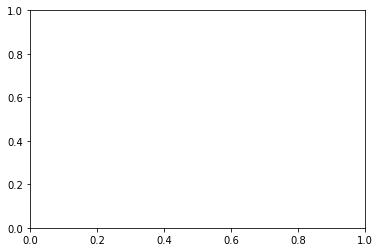

In [4]:
m = K
def theoretical_bound(T):
    return 8 * m * np.sqrt(T * K * d * np.log(np.e * K / m) * np.log(np.sqrt(T) * m * dist_lower_bound.context.true_sigma * dist_lower_bound.thetas.true_R))

import matplotlib.pyplot as plt

plt.plot(lenghts, data[0], label="SemiBanditExp3")
plt.plot(lenghts, data[1], label="UniformRandom")
#plt.plot(lenghts, theoretical_bound(np.array(lenghts)), label="Theretical Bound")
plt.legend()
plt.show()